# Assignment: Compresive Strength Concrete Problem


### Abstract: 

Concrete is the most important material in civil engineering. The concrete compressive strength (concrete strength to bear the load) is a highly nonlinear function of age and ingredients.  <br><br>

<table border="1"  cellpadding="6" bordercolor="red">
	<tbody>
        <tr>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Data Set Characteristics:&nbsp;&nbsp;</b></p></td>
		<td><p class="normal">Multivariate</p></td>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Number of Instances:</b></p></td>
		<td><p class="normal">1030</p></td>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Area:</b></p></td>
		<td><p class="normal">Physical</p></td>
        </tr>
     </tbody>
    </table>
<table border="1" cellpadding="6">
    <tbody>
        <tr>
            <td bgcolor="#DDEEFF"><p class="normal"><b>Attribute Characteristics:</b></p></td>
            <td><p class="normal">Real</p></td>
            <td bgcolor="#DDEEFF"><p class="normal"><b>Number of Attributes:</b></p></td>
            <td><p class="normal">9</p></td>
            <td bgcolor="#DDEEFF"><p class="normal"><b>Date Donated</b></p></td>
            <td><p class="normal">2007-08-03</p></td>
        </tr>
     </tbody>
    </table>
<table border="1" cellpadding="6">	
    <tbody>
    <tr>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Associated Tasks:</b></p></td>
		<td><p class="normal">Regression</p></td>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Missing Values?</b></p></td>
		<td><p class="normal">N/A</p></td>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Number of Web Hits:</b></p></td>
		<td><p class="normal">231464</p></td>
	</tr>
    </tbody>
    </table>

###  Description:
| Features Name | Data Type | Measurement | Description |
| -- | -- | -- | -- |
Cement (component 1) | quantitative | kg in a m3 mixture | Input Variable
Blast Furnace Slag (component 2) | quantitative | kg in a m3 mixture | Input Variable
Fly Ash (component 3) | quantitative | kg in a m3 mixture | Input Variable
Water (component 4) | quantitative | kg in a m3 mixture | Input Variable
Superplasticizer (component 5) | quantitative | kg in a m3 mixture | Input Variable
Coarse Aggregate (component 6) | quantitative | kg in a m3 mixture | Input Variable
Fine Aggregate (component 7) | quantitative | kg in a m3 mixture | Input Variable
Age | quantitative | Day (1~365) | Input Variable
Concrete compressive strength | quantitative | MPa | Output Variable

### WORKFLOW :
- Load Data
- Check Missing Values ( If Exist ; Fill each record with mean of its feature )
- Standardized the Input Variables. **Hint**: Centeralized the data
- Split into 50% Training(Samples,Labels) , 30% Test(Samples,Labels) and 20% Validation Data(Samples,Labels).
- Model : input Layer (No. of features ), 3 hidden layers including 10,8,6 unit & Output Layer with activation function relu/tanh (check by experiment).
- Compilation Step (Note : Its a Regression problem , select loss , metrics according to it)
- Train the Model with Epochs (100) and validate it
- If the model gets overfit tune your model by changing the units , No. of layers , activation function , epochs , add dropout layer or add Regularizer according to the need .
- Evaluation Step
- Prediction


# Load Data:
[Click Here to Download DataSet](https://github.com/ramsha275/ML_Datasets/blob/main/compresive_strength_concrete.csv)

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
tf.__version__

'2.4.1'

In [ ]:
import io
from google.colab import files
upoaded = files.upload()

Saving compresive_strength_concrete.csv to compresive_strength_concrete.csv


In [ ]:
df=pd.read_csv('compresive_strength_concrete.csv')
df.head

<bound method NDFrame.head of       Cement (component 1)(kg in a m^3 mixture)  ...  Concrete compressive strength(MPa, megapascals) 
0                                         540.0  ...                                             79.99
1                                         540.0  ...                                             61.89
2                                         332.5  ...                                             40.27
3                                         332.5  ...                                             41.05
4                                         198.6  ...                                             44.30
...                                         ...  ...                                               ...
1025                                      276.4  ...                                             44.28
1026                                      322.2  ...                                             31.18
1027                                      1

In [ ]:
df.isnull().sum()

Cement (component 1)(kg in a m^3 mixture)                0
Blast Furnace Slag (component 2)(kg in a m^3 mixture)    0
Fly Ash (component 3)(kg in a m^3 mixture)               0
Water  (component 4)(kg in a m^3 mixture)                0
Superplasticizer (component 5)(kg in a m^3 mixture)      0
Coarse Aggregate  (component 6)(kg in a m^3 mixture)     0
Fine Aggregate (component 7)(kg in a m^3 mixture)        0
Age (day)                                                0
Concrete compressive strength(MPa, megapascals)          0
dtype: int64

In [ ]:
df.dtypes

Cement (component 1)(kg in a m^3 mixture)                float64
Blast Furnace Slag (component 2)(kg in a m^3 mixture)    float64
Fly Ash (component 3)(kg in a m^3 mixture)               float64
Water  (component 4)(kg in a m^3 mixture)                float64
Superplasticizer (component 5)(kg in a m^3 mixture)      float64
Coarse Aggregate  (component 6)(kg in a m^3 mixture)     float64
Fine Aggregate (component 7)(kg in a m^3 mixture)        float64
Age (day)                                                  int64
Concrete compressive strength(MPa, megapascals)          float64
dtype: object

In [ ]:
x = df[['Cement (component 1)(kg in a m^3 mixture)','Blast Furnace Slag (component 2)(kg in a m^3 mixture)','Fly Ash (component 3)(kg in a m^3 mixture)','Water  (component 4)(kg in a m^3 mixture)','Superplasticizer (component 5)(kg in a m^3 mixture)','Coarse Aggregate  (component 6)(kg in a m^3 mixture)','Fine Aggregate (component 7)(kg in a m^3 mixture)','Age (day)']].values

In [ ]:
y= df[['Concrete compressive strength(MPa, megapascals) ']].values

In [ ]:
x.shape

(1030, 8)

In [ ]:
y.shape

(1030, 1)

In [ ]:
from sklearn.model_selection import train_test_split
train_x, test_x, train_label, test_label = train_test_split(x, y, test_size=0.30, random_state=42)

In [ ]:
mean=train_x.mean(axis=0)
train_x-=mean
std=train_x.std(axis=0)
train_x/=std
test_x-=mean
test_x/=std

In [ ]:
from keras import models
from keras import layers
def build_model():
  model=models.Sequential()
  model.add(layers.Dense(10,activation='relu',input_shape=(train_x.shape[1],)))
  model.add(layers.Dense(8,activation='relu'))
  model.add(layers.Dense(6,activation='relu'))
  model.add(layers.Dense(1))
  model.compile(optimizer='rmsprop',loss='mse',metrics=['mae'])
  return model

In [ ]:
k=4
samples=len(train_x)//k
num_epochs=500
all_scores=[]
all_mae_history=[]
for i in range (k):
  print('proccessing fold #',i)
  validation_x=train_x[i*samples:(i+1)*samples]
  validation_label=train_label[i*samples:(i+1)*samples]
  partial_train_x=np.concatenate([train_x[:i*samples],train_x[(i+1)*samples:]],axis=0)
  partial_train_label=np.concatenate([train_label[:i*samples],train_label[(i+1)*samples:]],axis=0)
  model= build_model()
  history=model.fit(partial_train_x, partial_train_label, epochs=num_epochs, batch_size=1,verbose=0)
  validation_mse, validation_mae=model.evaluate(validation_x,validation_label,verbose=0)
  all_scores.append(validation_mae)
  mae_history=history.history['mae']
  all_mae_history.append(mae_history)

proccessing fold # 0
proccessing fold # 1
proccessing fold # 2
proccessing fold # 3


In [ ]:
average_mae_history=[np.mean([x[i] for x in all_mae_history]) for i in range(num_epochs)]
print('All fold validation Errors:', all_scores)
print('Mean of all fold Validation Errors:', np.mean(all_scores))
print('Average_mae_histories: ', all_mae_history)

All fold validation Errors: [5.510146617889404, 4.820169925689697, 5.667217254638672, 5.436256408691406]
Mean of all fold Validation Errors: 5.358447551727295
Average_mae_histories:  [[35.15935134887695, 28.340986251831055, 14.718647956848145, 10.889187812805176, 9.924062728881836, 9.469943046569824, 9.088001251220703, 8.840189933776855, 8.667064666748047, 8.506978034973145, 8.437639236450195, 8.317161560058594, 8.293318748474121, 8.237095832824707, 8.203965187072754, 8.12760066986084, 8.093036651611328, 8.113468170166016, 8.055266380310059, 7.99275541305542, 8.04442310333252, 8.022317886352539, 8.025774955749512, 7.968790531158447, 7.949490547180176, 7.898070335388184, 7.866966247558594, 7.802319049835205, 7.744492530822754, 7.840054988861084, 7.764244079589844, 7.779314994812012, 7.696966171264648, 7.673675537109375, 7.614015102386475, 7.661105632781982, 7.638876914978027, 7.5278239250183105, 7.501359939575195, 7.4952874183654785, 7.4485673904418945, 7.427161693572998, 7.350630283355

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

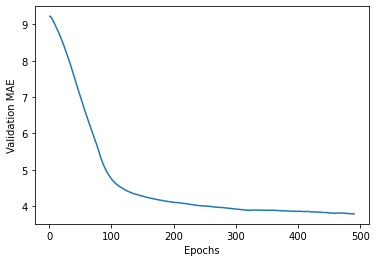

In [ ]:
def smooth_curve(points, factor=0.9):
  smoothed_points=[]
  for point in points:
    if smoothed_points:
      previous=smoothed_points[-1]
      smoothed_points.append(previous*factor + point*(1-factor))
    else:
      smoothed_points.append(point)
  return smoothed_points
smoothed_mae_history= smooth_curve(average_mae_history[10:])
plt.plot(range(1,len(smoothed_mae_history)+1),smoothed_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()


In [ ]:
model=build_model()
model.fit(train_x,train_label, epochs=500, batch_size=4,verbose=0)
test_mse_score,test_mae_score=model.evaluate(test_x,test_label)
print(test_mae_score)

10/10 [==============================] - 0s 2ms/step - loss: 38.0560 - mae: 4.6716
4.671586036682129
